In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from sklearn import svm
import PIL
import pickle
import cv2

In [2]:
model = pickle.load(open('../../res/model_v3.sav' , 'rb'))

In [3]:
test_df = pd.read_csv('../../data/test_vB.csv')
X_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, :1]

In [8]:
X_test.head()

1    2    3    4    5    6    7    8    9   10  ...  7387  7388  7389  \
0  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   
1  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   
2  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   
3  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   
4  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   

   7390  7391  7392  7393  7394  7395  7396  
0   255   255   255   255   255   255   255  
1   255   255   255   255   255   255   255  
2   255   255   255   255   255   255   255  
3   255   255   255   255   255   255   255  
4   255   255   255   255   255   255   255  

[5 rows x 7396 columns]

In [7]:
np.reshape(X_test.values[0], (86,86)).shape

(86, 86)

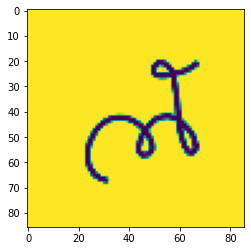

In [8]:
plt.imshow(np.reshape(X_test.values[0], (86,86)))

In [9]:
cv2.imwrite('test.png', np.reshape(X_test.values[0], (86,86)))

True

In [10]:
y_preds = model.predict(X_test)

In [12]:
y_test_list = y_test['0'].tolist()
y_preds_list = list(y_preds)

In [16]:
hash_map = {
    1:12,
    2:13,
    3:14,
    4:15,
    5:16,
    6:17,
    7:18,
    8:19,
    9:20,
    10:21,
    11:22,
    12:23,
    13:24,
    14:25,
    15:26,
    16:27,
    17:28,
    18:29,
    19:30,
    20:31,
    21:32,
    22:33,
    23:34,
    24:35,
    25:36,
    26:37,
    27:38,
    28:39,
    29:40,
    30:41,
    31:42,
    32:43,
    33:44,
    34:45,
    35:46,
    36:48,
    37:51,
    38:52,
    39:53,
    40:54,
    41:55,
    42:50,
    43:49,
    44:47
}

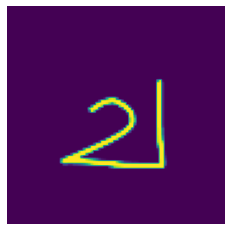

In [28]:
path = '../../results/io_char/vB_on_v3'

new_df_list = []
x = 0

for i in range(len(test_df.values)):
    if y_test_list[i] != hash_map[y_preds_list[i]]:
        foldername = f'/{y_test_list[i]}_as_{hash_map[y_preds_list[i]]}'
        pix = X_test.values[i]
        img_pix = np.reshape(pix, (86,86))
        img_pix = cv2.bitwise_not(img_pix)
        
        folderpath = path + foldername
        
        try: 
            os.mkdir(folderpath)
        except: 
            pass
        
        filepath = folderpath + f'/image{x}.png'
        x+=1
        plt.imshow(img_pix)
        plt.axis("off")
        plt.savefig(filepath)